# LEZIONE 11

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

## Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Soluzione:
Esploro vari valori di sigma e di Ntrain nelle seguenti due figure, per capire come cambiano le prestazioni del modello di Neural Network in funzione di questi

2025-07-08 10:30:20.298092: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-08 10:30:20.511056: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-08 10:30:20.708668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751963420.884173    2851 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751963420.930068    2851 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751963421.312631    2851 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin


==== Training con sigma = 0.00 ====



/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-08 10:30:31.631141: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Test loss vs y_target: 0.0000 | Test MSE: 0.0000

==== Training con sigma = 0.12 ====

Test loss vs y_target: 0.0000 | Test MSE: 0.0000

==== Training con sigma = 0.25 ====

Test loss vs y_target: 0.0001 | Test MSE: 0.0001

==== Training con sigma = 0.38 ====

Test loss vs y_target: 0.0008 | Test MSE: 0.0008

==== Training con sigma = 0.50 ====

Test loss vs y_target: 0.0006 | Test MSE: 0.0006


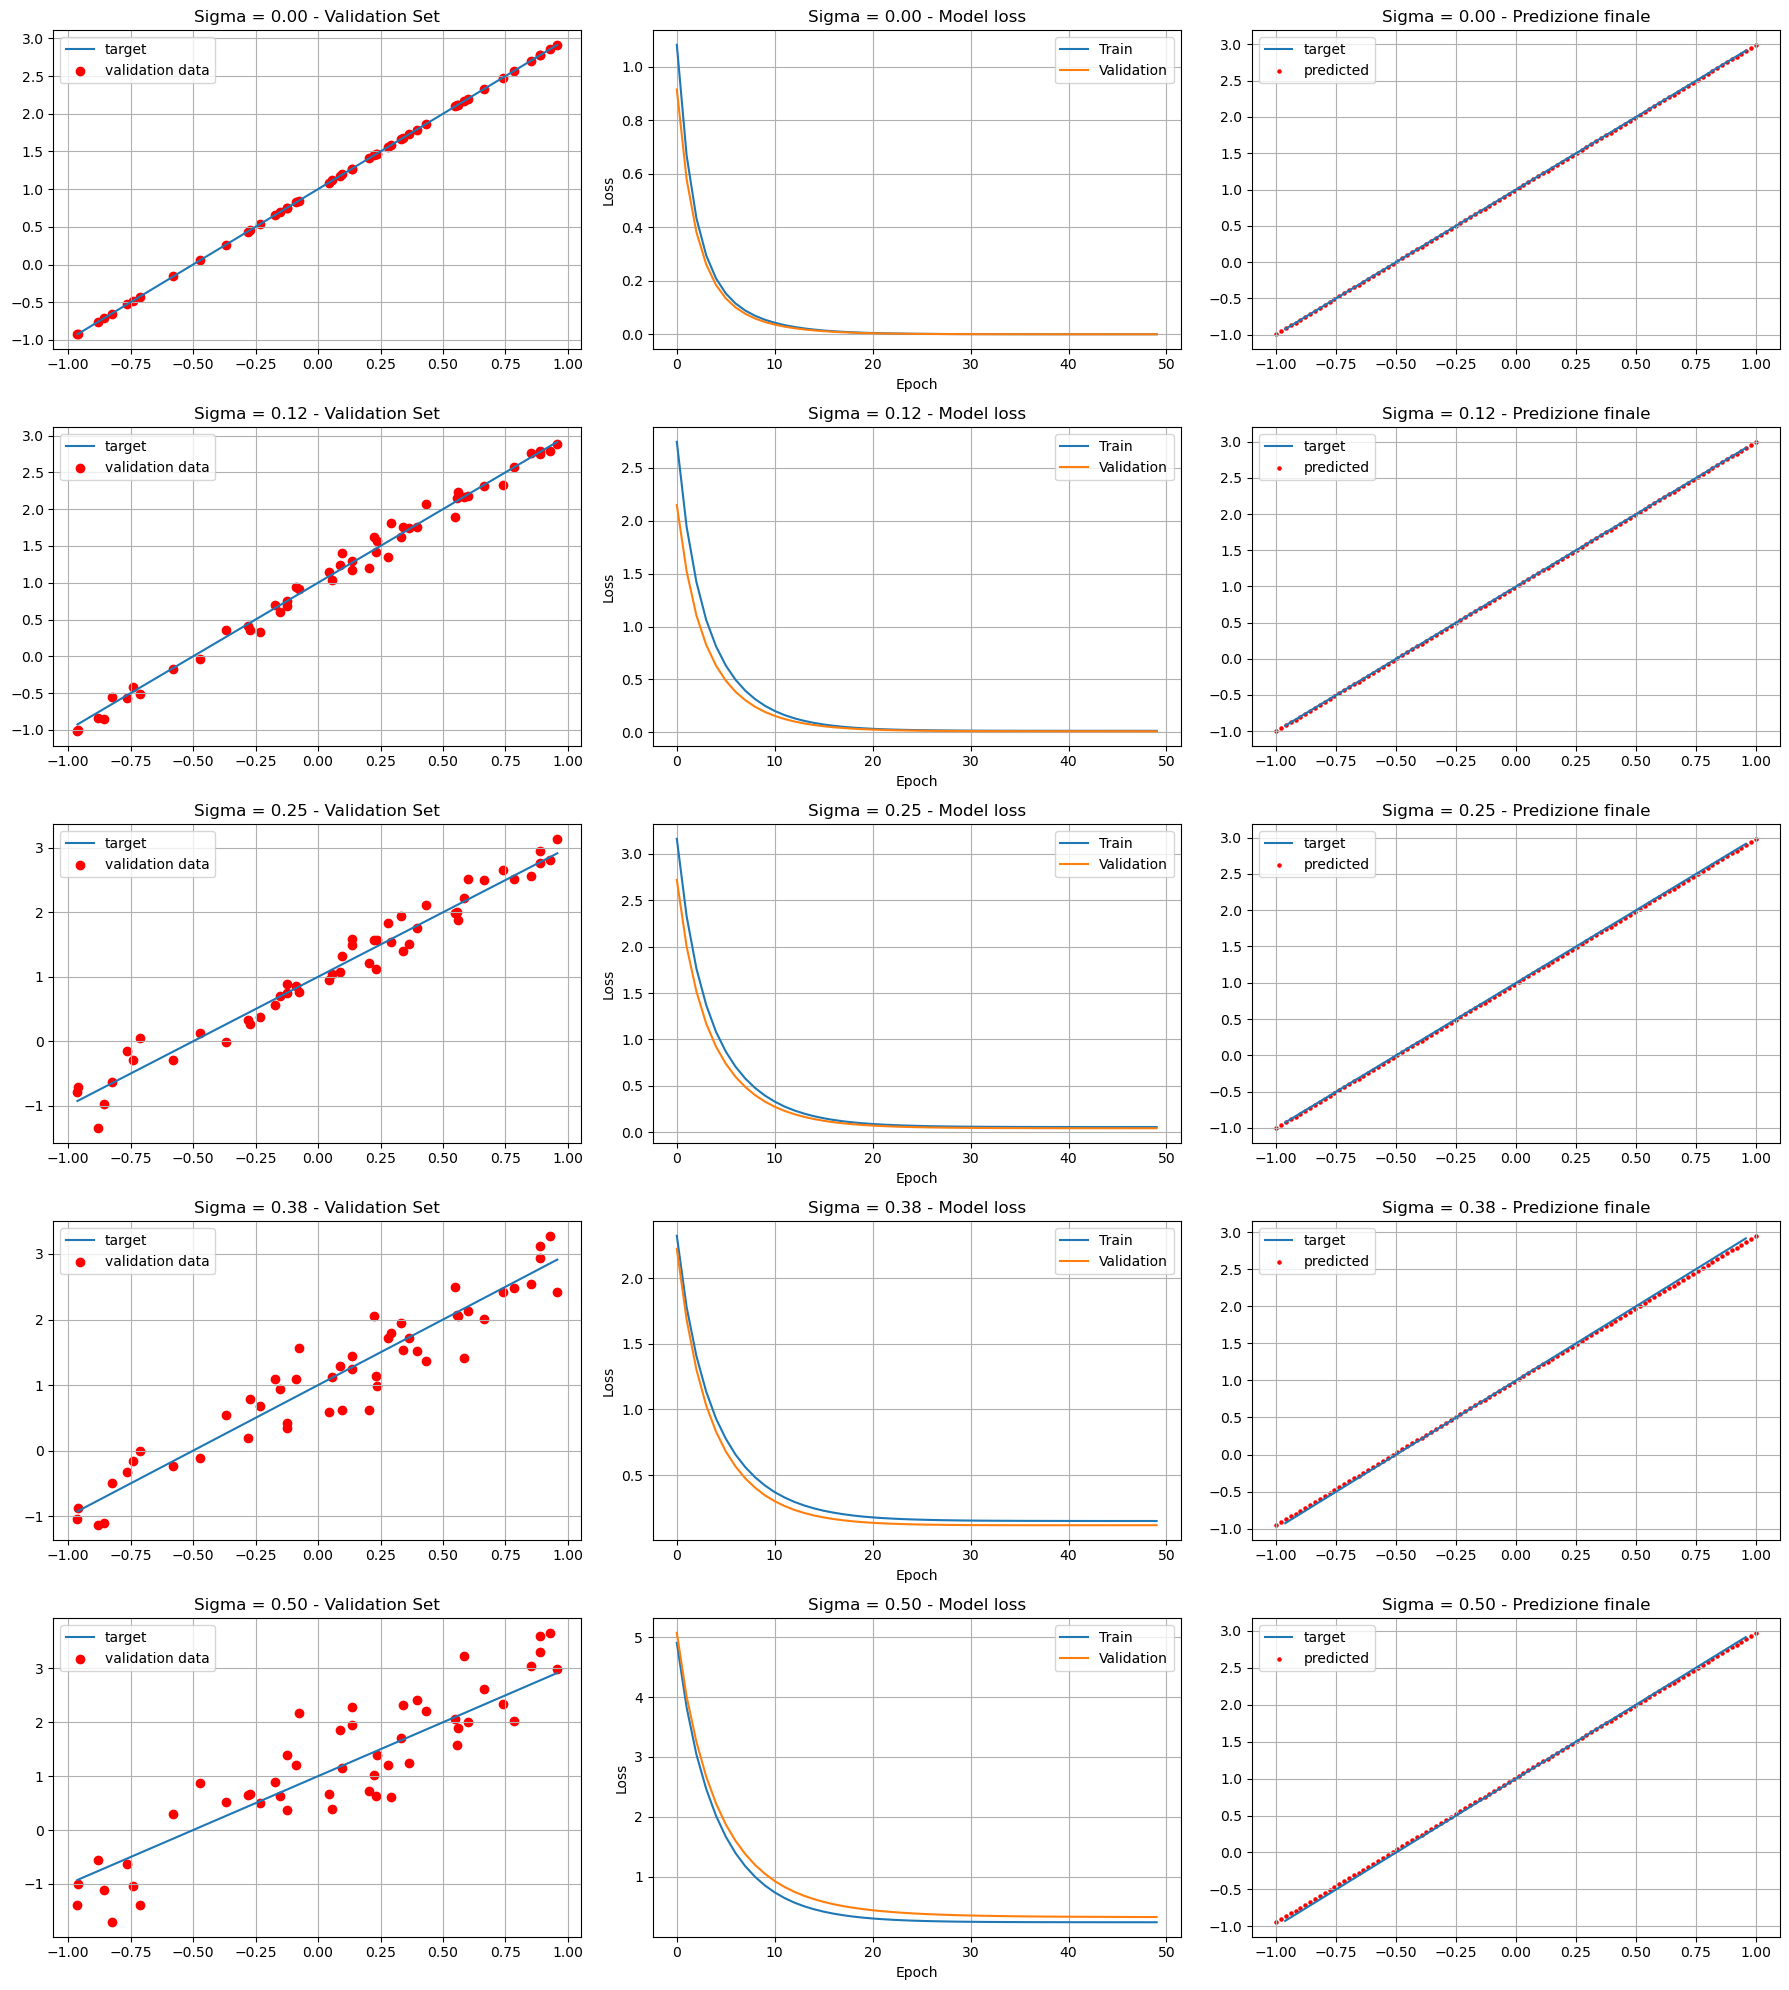

In [1]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    return model

m = 2 # slope
b = 1 # intersect
sigmas = np.linspace(0, 0.5, 5)  # valori di rumore

np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b

# Creiamo una figura grande con righe = len(sigmas), colonne = 3
fig, axes = plt.subplots(len(sigmas), 3, figsize=(18, 4 * len(sigmas)))

for idx, sigma in enumerate(sigmas):
    print(f"\n==== Training con sigma = {sigma:.2f} ====\n")

    x_train = np.random.uniform(-1, 1, 500)
    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)

    # crea e addestra il modello
    model = create_model()
    history = model.fit(x=x_train, y=y_train, 
                        verbose=0, batch_size=32, epochs=50,
                        shuffle=True,
                        validation_data=(x_valid, y_valid))

    # evaluation
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print(f"Test loss vs y_target: {score[0]:.4f} | Test MSE: {score[1]:.4f}")

    # Plot 1: dati reali e validation
    ax1 = axes[idx, 0]
    ax1.plot(x_valid, y_target, label='target')
    ax1.scatter(x_valid, y_valid, color='r', label='validation data')
    ax1.set_title(f"Sigma = {sigma:.2f} - Validation Set")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: andamento della loss
    ax2 = axes[idx, 1]
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title(f"Sigma = {sigma:.2f} - Model loss")
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    ax2.grid(True)

    # Plot 3: predizione vs funzione target
    x_predicted = np.linspace(-1, 1, 100)
    y_predicted = model.predict(x_predicted, verbose=0)

    ax3 = axes[idx, 2]
    ax3.plot(x_valid, y_target, label='target')
    ax3.scatter(x_predicted, y_predicted, color='r', label='predicted', s =5)
    ax3.set_title(f"Sigma = {sigma:.2f} - Predizione finale")
    ax3.legend()
    ax3.grid(True)

plt.tight_layout()
plt.show()



Nel codice seguente provo invece a variare il numero di valori usati per il training, fissando $\sigma = 0.3$:

parto da un training eseguito con soli 50 valori generati, fino ad arrivare fino a 500 valori di training. Mi aspetto ovviamente che all'aumentare del numero di valori usati per allenare il modello, i modelli predetti nel grafico a destra si avvicinino sempre di più ai valori di target generati con l'espressione analitica.
Infatti se usoun numero troppo piccolo di dati per il training mi aspetto che una eventuale fluttuzione statistica abbia grosse probabilità di influenzare le predizioni del modello.



==== Training con N_train = 50 ====

Test loss vs y_target: 0.0528 | Test MSE: 0.0528

==== Training con N_train = 100 ====

Test loss vs y_target: 0.0531 | Test MSE: 0.0531

==== Training con N_train = 200 ====

Test loss vs y_target: 0.0263 | Test MSE: 0.0263

==== Training con N_train = 500 ====

Test loss vs y_target: 0.0001 | Test MSE: 0.0001


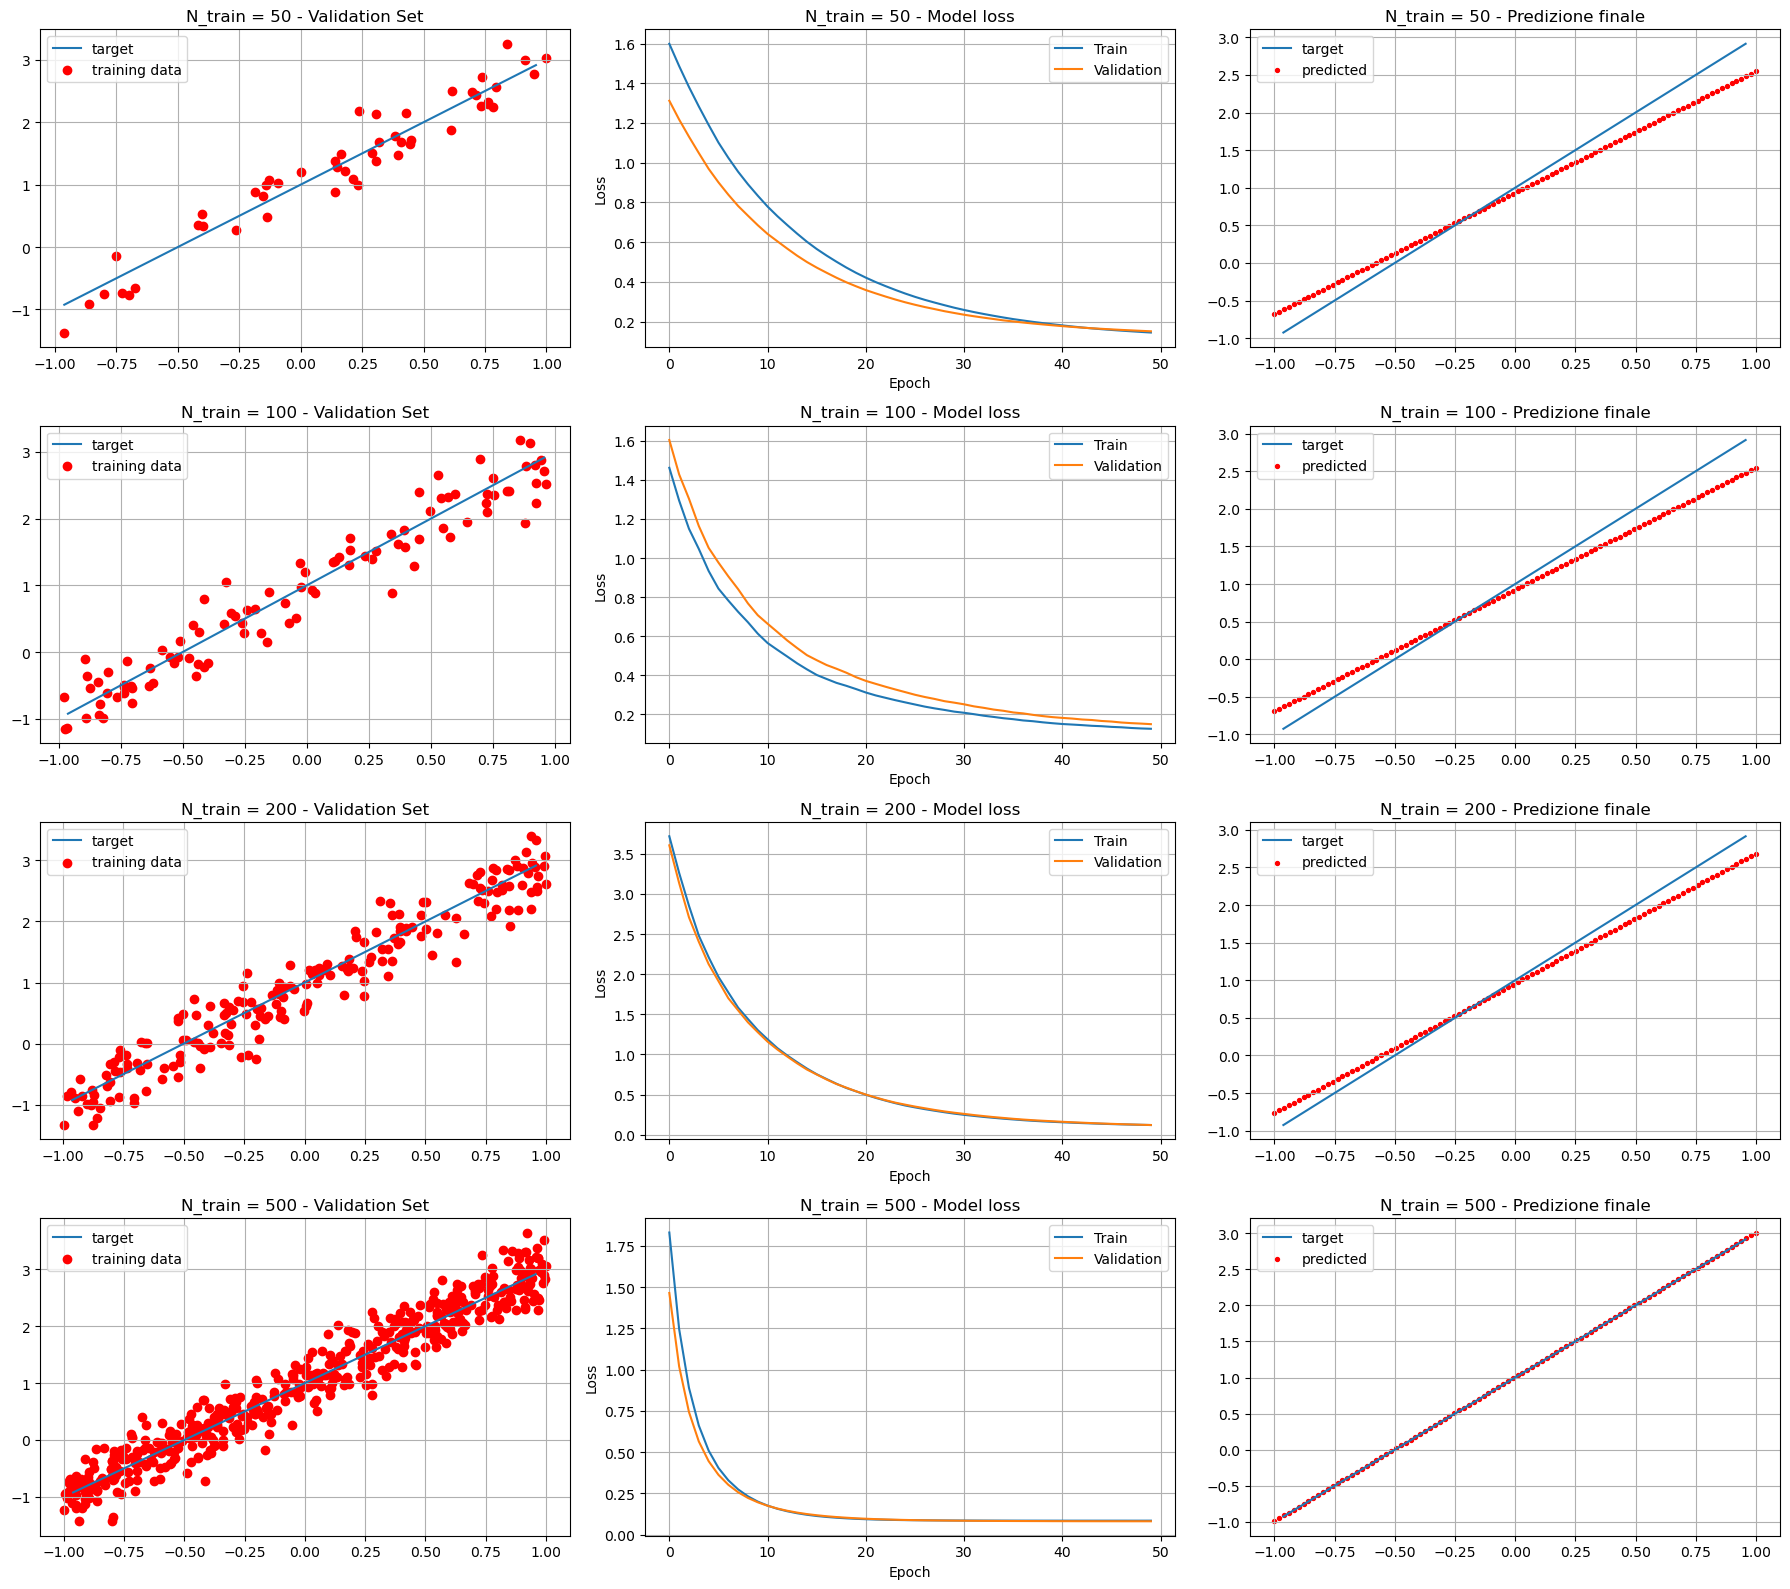

In [2]:
 # intersect
sigma = 0.3  # rumore fisso

np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b
y_valid = np.random.normal(y_target, sigma)

N_train = [50, 100, 200, 500]

fig, axes = plt.subplots(len(N_train), 3, figsize=(18, 4 * len(N_train)))

for idx, N_train in enumerate(N_train):
    print(f"\n==== Training con N_train = {N_train} ====\n")

    x_train = np.random.uniform(-1, 1, N_train)
    y_train = np.random.normal(m * x_train + b, sigma)

    model = create_model()
    history = model.fit(x=x_train, y=y_train,
                        verbose=0, batch_size=32, epochs=50,
                        shuffle=True,
                        validation_data=(x_valid, y_valid))

    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print(f"Test loss vs y_target: {score[0]:.4f} | Test MSE: {score[1]:.4f}")

    # Plot 1: dati reali e validation
    ax1 = axes[idx, 0]
    ax1.plot(x_valid, y_target, label='target')
    ax1.scatter(x_train, y_train, color='r', label='training data')
    ax1.set_title(f"N_train = {N_train} - Validation Set")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: andamento della loss
    ax2 = axes[idx, 1]
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title(f"N_train = {N_train} - Model loss")
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    ax2.grid(True)

    # Plot 3: predizione vs funzione target
    x_predicted = np.linspace(-1, 1, 100)
    y_predicted = model.predict(x_predicted, verbose=0)

    ax3 = axes[idx, 2]
    ax3.plot(x_valid, y_target, label='target')
    ax3.scatter(x_predicted, y_predicted, color='r', label='predicted', s =8)
    ax3.set_title(f"N_train = {N_train} - Predizione finale")
    ax3.legend()
    ax3.grid(True)

plt.tight_layout()
plt.show()

Le figure mostrate, in particolare quelle sulla destra, mostrano esattamente quello che ci si poteva aspettare anche a priori.

## ESERCIZIO 11.2


In [2]:
%reset -f

import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam


In [3]:
def func(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

x_train2 = np.random.uniform(-1, 1, 1000)
x_valid2 = np.random.uniform(-1, 1, 50)
x_valid2.sort()
y_target2 = func(x_valid2) # ideal (target) linear function

sigma2 = 0.4 # noise standard deviation, for the moment it is absent
y_train2 = np.random.normal(func(x_train2), sigma2) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(func(x_valid2) , sigma2)

Nel seguente grafico mostro i valori generati per il training del modello, rispetto ai valori di target

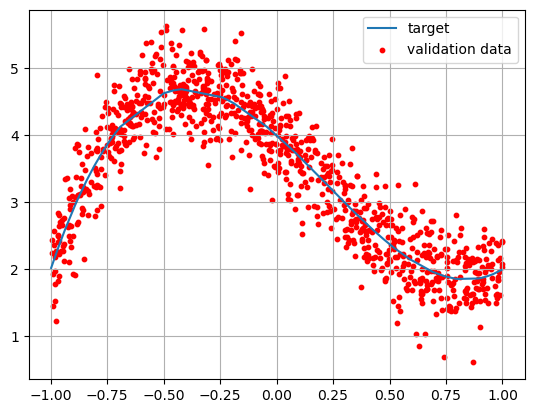

In [4]:
plt.plot(x_valid2, y_target2, label='target')
plt.scatter(x_train2, y_train2, color='r', label='validation data', s=10)
plt.legend()
plt.grid(True)
plt.show()

Training: activation=tanh, optimizer=adam


/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training: activation=tanh, optimizer=sgd
Training: activation=tanh, optimizer=rmsprop
Training: activation=tanh, optimizer=nadam
Training: activation=relu, optimizer=adam
Training: activation=relu, optimizer=sgd
Training: activation=relu, optimizer=rmsprop
Training: activation=relu, optimizer=nadam
Training: activation=sigmoid, optimizer=adam
Training: activation=sigmoid, optimizer=sgd
Training: activation=sigmoid, optimizer=rmsprop
Training: activation=sigmoid, optimizer=nadam
Training: activation=swish, optimizer=adam
Training: activation=swish, optimizer=sgd
Training: activation=swish, optimizer=rmsprop
Training: activation=swish, optimizer=nadam


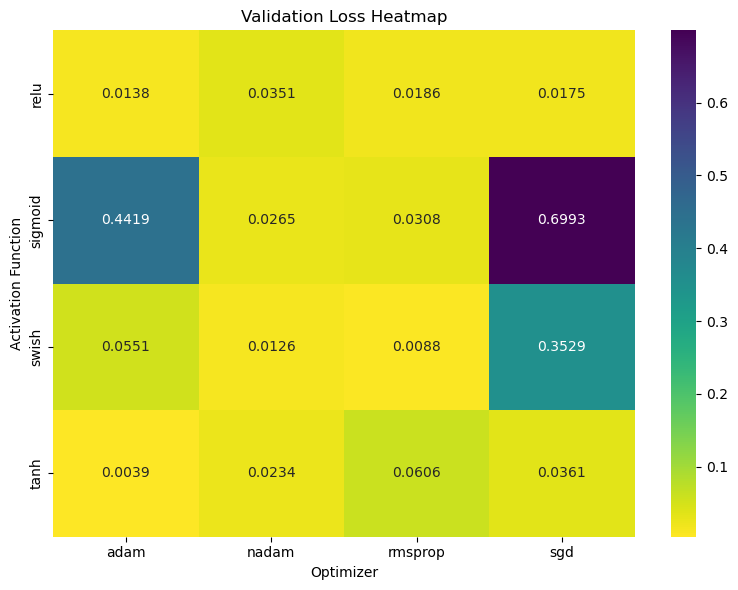

In [5]:


# === Parametri ===
activation_functions = [ 'tanh', 'relu', 'sigmoid', 'swish']
optimizer_constructors = {
    'adam': lambda: Adam(learning_rate=0.01),
    'sgd': lambda: SGD(learning_rate=0.01),
    'rmsprop': lambda: RMSprop(learning_rate=0.01),
    'nadam': lambda: Nadam(learning_rate=0.01)
}
epochs = 50
batch_size = 32

# === Storage ===
models_vec = []
histories_vec = []
results = []

# === Ciclo Training ===
for act in activation_functions:
    for opt_name, opt_constructor in optimizer_constructors.items():
        print(f"Training: activation={act}, optimizer={opt_name}")

        optimizer = opt_constructor()  # nuova istanza ogni volta

        model = Sequential([
            Dense(40, activation=act, input_shape=(1,)),
            Dense(20, activation=act),
            Dense(1)
        ])

        model.compile(optimizer=optimizer, loss='mse')

        history = model.fit(
            x_train2, y_train2,
            validation_data=(x_valid2, y_target2),
            batch_size=batch_size,
            epochs=epochs,
            verbose=0
        )

        val_loss = model.evaluate(x_valid2, y_target2, verbose=0)

        models_vec.append(model)
        histories_vec.append(history)
        results.append({
            'activation': act,
            'optimizer': opt_name,
            'val_loss': val_loss
        })

# === HEATMAP ===
results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index='activation', columns='optimizer', values='val_loss')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis_r")
plt.title("Validation Loss Heatmap")
plt.xlabel("Optimizer")
plt.ylabel("Activation Function")
plt.tight_layout()
plt.show()


La performance migliore è data dalla combinazione di
- activation function = `tanh`; optimizer = `nadam`

Vado adesso a testare per questa coppia activation function- optimizer, alcuni diversi valori da assegnare come numero di layers e come numero di neuroni per hidden layer. 

In [ ]:
hidden_layers_list = [1, 2, 3]
neurons_list = [5, 10, 20]
activation = 'tanh'
optimizer_constructor = lambda: Adam(learning_rate=0.01)
epochs = 50
batch_size = 32

# === Storage ===
results = {}
final_val_losses = []

# === Modello constructor ===
def make_model(n_hidden, n_neurons, activation):
    return Sequential(
        [Dense(n_neurons, activation=activation, input_shape=(1,))] +
        [Dense(n_neurons, activation=activation) for _ in range(n_hidden - 1)] +
        [Dense(1)]
    )

# === Ciclo training ===
for n_hidden in hidden_layers_list:
    for n_neurons in neurons_list:
        print(f"Training: {n_hidden} hidden layers, {n_neurons} neurons/layer")

        model = make_model(n_hidden, n_neurons, activation)
        optimizer = optimizer_constructor()

        model.compile(optimizer=optimizer, loss='mse')

        history = model.fit(
            x_train2, y_train2,
            validation_data=(x_valid2, y_target2),
            batch_size=batch_size,
            epochs=epochs,
            verbose=0
        )

        val_loss = model.evaluate(x_valid2, y_target2, verbose=0)
        key = f"{n_hidden}HL_{n_neurons}N"
        results[key] = history.history['val_loss']
        final_val_losses.append((key, val_loss))

        tf.keras.backend.clear_session()  # libera risorse

Training: 1 hidden layers, 5 neurons/layer


/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training: 1 hidden layers, 10 neurons/layer
Training: 1 hidden layers, 20 neurons/layer
Training: 2 hidden layers, 5 neurons/layer
Training: 2 hidden layers, 10 neurons/layer
Training: 2 hidden layers, 20 neurons/layer
Training: 3 hidden layers, 5 neurons/layer
Training: 3 hidden layers, 10 neurons/layer
Training: 3 hidden layers, 20 neurons/layer


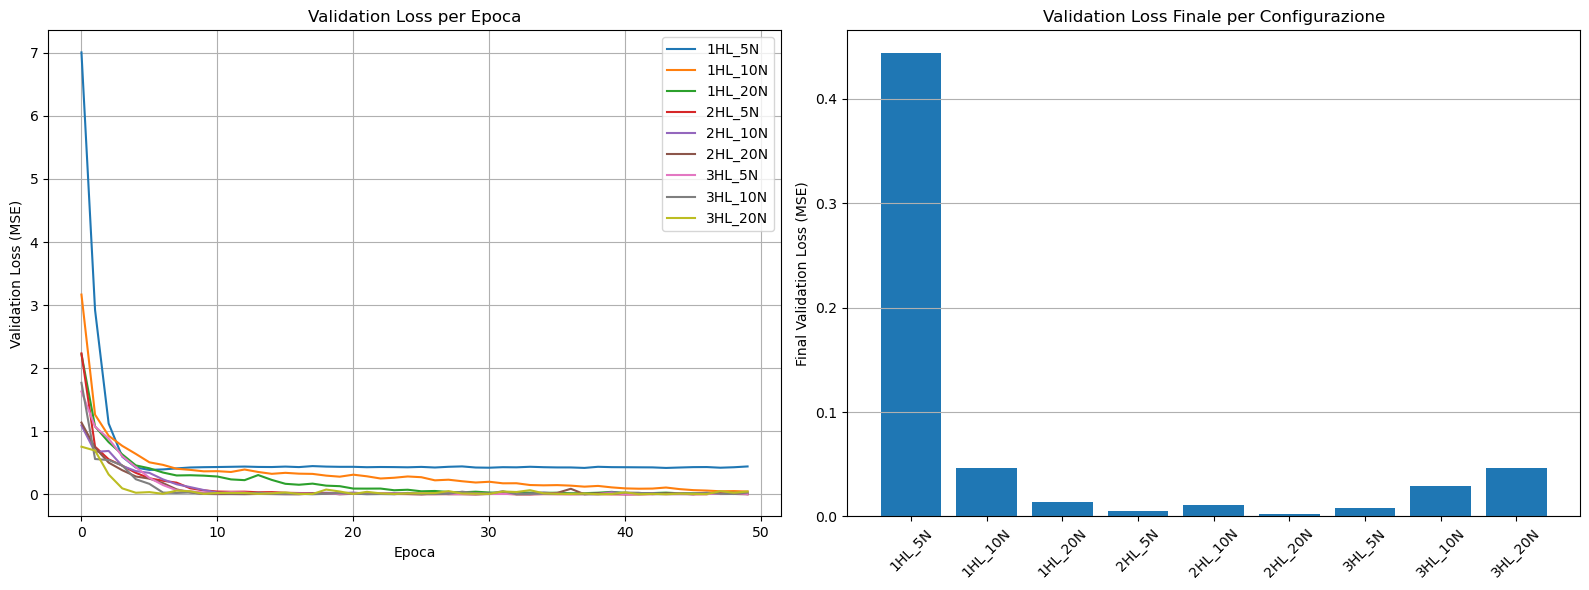

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: curva val_loss per epoca
for key, val_losses in results.items():
    axes[0].plot(val_losses, label=key)
axes[0].set_title("Validation Loss per Epoca")
axes[0].set_xlabel("Epoca")
axes[0].set_ylabel("Validation Loss (MSE)")
axes[0].legend()
axes[0].grid(True)

# Subplot 2: istogramma val_loss finale
labels, losses = zip(*final_val_losses)
axes[1].bar(labels, losses)
axes[1].set_title("Validation Loss Finale per Configurazione")
axes[1].set_ylabel("Final Validation Loss (MSE)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

Dall'isogramma di destra vediamo come in un primo momento, al crescere del niumero di hidden layers e di neuroni, il valore finale della loss calcolato sui valori di validazione, rispetto ai valori target, tende a decrescere. Ciò significa che il nostro modello è più efficace al crescere dei valori di questi parametri.
Tuttavia, quando uso 3 hidden layers con sempre più neuroni noto un andamento crescente della loss: Perchè?

Ipotizzo che la causa sia l'overfitting del modello sui dati di training: la funzione che voglio fittare è una funzione di terzp grado, non eccessivamente complessa e con solo 4 parametri da ottimizzare: allora nel momento in cui uso un modello troppo complicato, questo inizia a diventare troppo specifico nell'analizzare i dati di training, e perde di efficacia nel generalizzare le predizioni su un campione diverso.

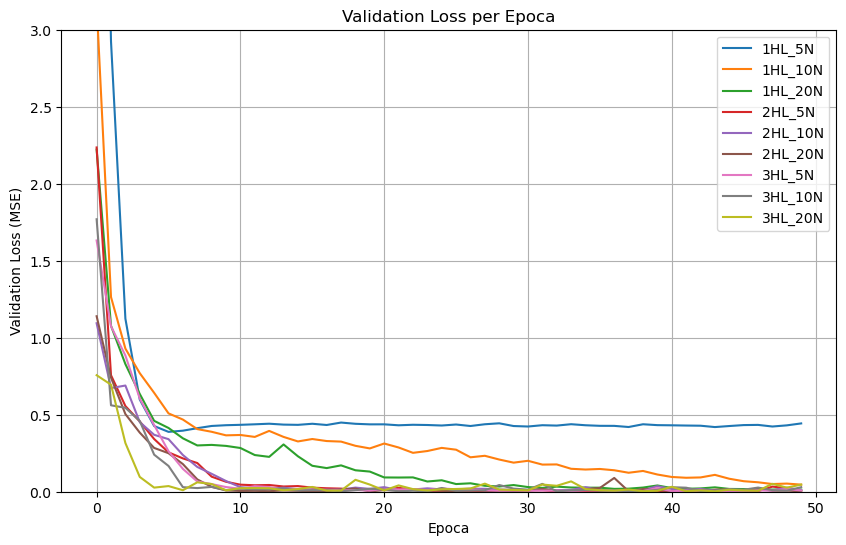

In [13]:
plt.figure(figsize=(10, 6))
for key, val_losses in results.items():
    plt.plot(val_losses, label=key)
plt.title("Validation Loss per Epoca")
plt.xlabel("Epoca")
plt.ylabel("Validation Loss (MSE)")
plt.legend()
plt.grid(True)
plt.ylim(0,3)
plt.show()

Qua mostro l'andamento della loss di ciascun momdello in funzione delle epoche. Non sono necessari più di due hidden layers per ottenere una loss ottimale. Anzi, andando ad osservare l'overfitting con 3 layers, il numero ideale risulta essere proprio 2.

Osservo la capacità di predire valori nel rage di x uguale a quello utilizzato per il training. Inoltre vado a vedere come si comporti il modello nel predire valori all'esterno del range di x usato nel training.

Costruisco il modello con i parametri migliori, e vado a valutarne le prestazioni e le capacità predittive sulla funzione richiesta:

In [16]:
final_model = make_model(2, 20, activation)
optimizer = optimizer_constructor()

final_model.compile(optimizer=optimizer, loss='mse')

history = final_model.fit(
    x_train2, y_train2,
    validation_data=(x_valid2, y_target2),
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


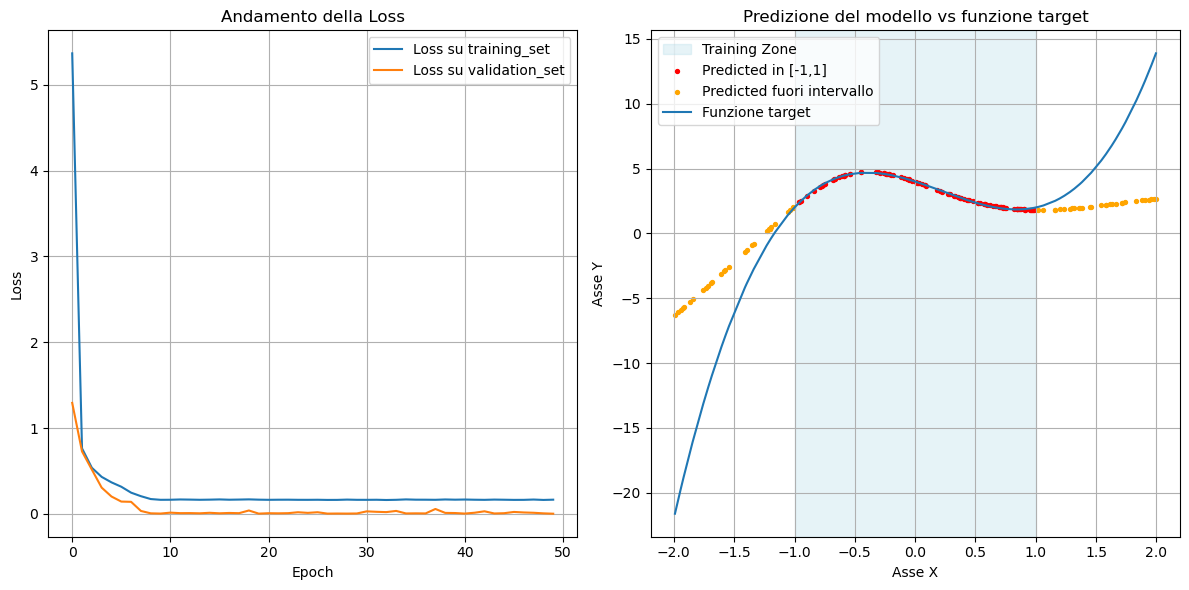

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 riga, 2 colonne

# === PRIMO PLOT: andamento della loss ===
ax = axes[0]
ax.set_title("Andamento della Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(history.history['loss'], label='Loss su training_set')
ax.plot(history.history['val_loss'], label='Loss su validation_set')
ax.legend()
ax.grid()

# === SECONDO PLOT: predizione vs target ===
ax2 = axes[1]
x_predicted = np.random.uniform(-1, 1, 100)
x_out = np.concatenate([np.random.uniform(-2, -1, 30), np.random.uniform(1, 2, 30)])
x_tot = np.concatenate([x_predicted, x_out])
x_tot.sort()

# Predizioni
y_predicted = final_model.predict(x_predicted)
y_out = final_model.predict(x_out)
y_target_tot = func(x_tot)

ax2.set_title("Predizione del modello vs funzione target")
ax2.set_xlabel("Asse X")
ax2.set_ylabel("Asse Y")
ax2.axvspan(-1, 1, color='lightblue', alpha=0.3, label='Training Zone')
ax2.scatter(x_predicted, y_predicted, color='r', s=8, label='Predicted in [-1,1]')
ax2.scatter(x_out, y_out, color='orange', s=8, label='Predicted fuori intervallo')
ax2.plot(x_tot, y_target_tot, label='Funzione target')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Come ci si poteva aspettare il modello è preciso nel training_range, mentre si discosta dalla funzione analitica al di fuori di esso.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Vado ad allenare il modello su una funzione 3D, con lo stesso metodo utilizzato fino ad ora.

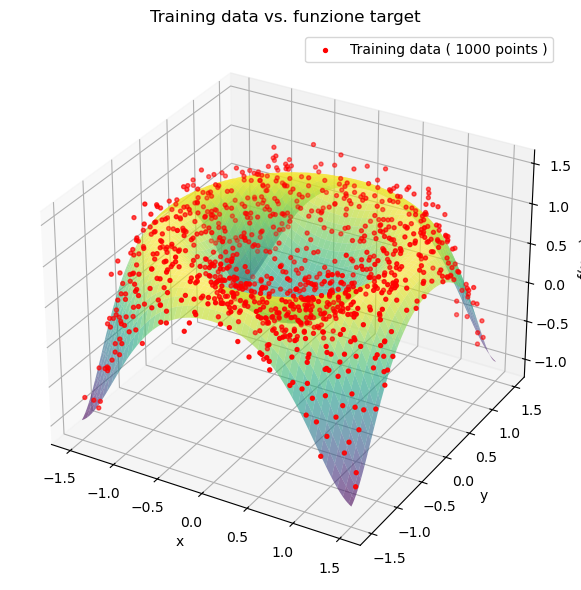

In [ ]:
%reset -f
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  

def func(x, y):
    return np.sin( x**2 + y**2)

x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid = np.random.uniform(-1.5, 1.5, 100)

z_target = func(x_valid, y_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(x_valid, y_valid) , sigma)


x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Crea figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Superficie
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Dati di training come scatter
ax.scatter(x_train, y_train, z_train, color='r', s=8, label="Training data ( 1000 points )")

# Etichette e legenda
ax.set_title("Training data vs. funzione target")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
nep= 200
n_neurons= 30

pair_train  = np.column_stack((x_train, y_train))   
pair_valid  = np.column_stack((x_valid, y_valid))   

modeltanh = tf.keras.Sequential()
modeltanh.add(Dense(40, input_shape = (2,), activation = 'tanh'))
modeltanh.add(Dense(20, activation = 'tanh'))
modeltanh.add(Dense(1, activation = 'tanh'))
modeltanh.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
modeltanh.fit(x = pair_train, y = z_train, verbose =0, batch_size = 32, epochs = nep, shuffle = True, validation_data = (pair_valid, z_valid))
historytanh = modeltanh.fit(x = pair_train, y = z_train, verbose=0, batch_size = 32, epochs = nep, shuffle = True, validation_data = (pair_valid, z_valid))

#questo score mi dice come il modello agisce rispetto al campione di validazione in cui lafunzione è falutata con un certo sigma predefinito
score = modeltanh.evaluate(pair_valid, z_valid, batch_size = 32, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

#qui invece vedo come il modello predice rispetto alla funzione target esatta 
score = modeltanh.evaluate(pair_valid, z_target, batch_size = 32, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

Test loss:		 0.05589843913912773
Test accuracy:		 0.05589843913912773
Test loss:		 0.006220225710421801
Test accuracy:		 0.006220225710421801


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


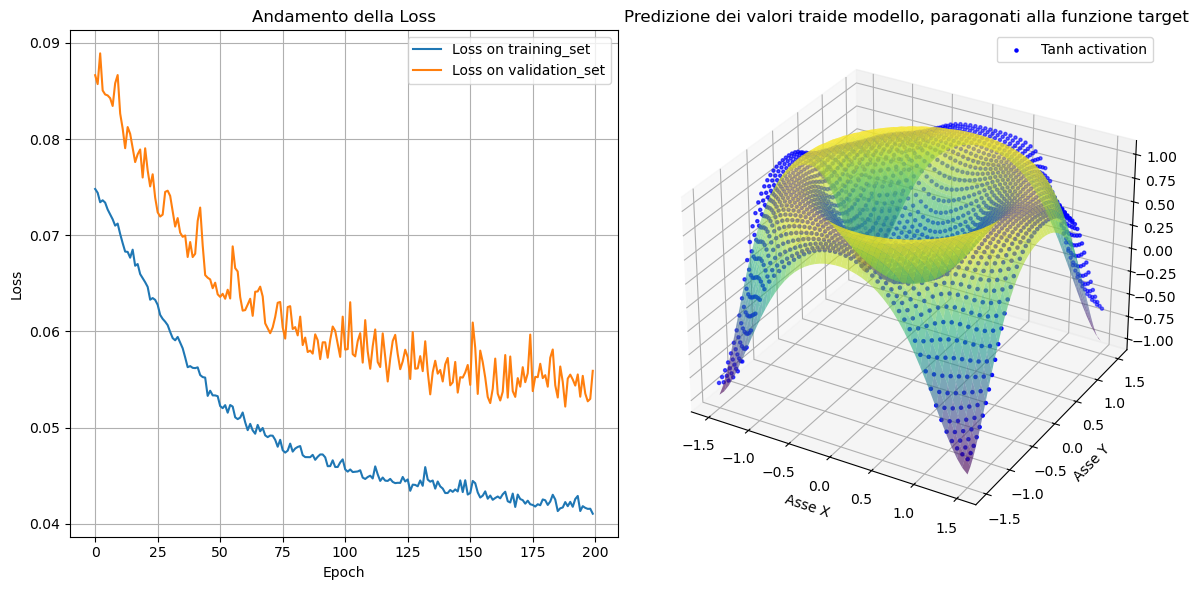

In [ ]:
fig = plt.figure(figsize=(12, 6))

#PRIMO PLOT
ax = fig.add_subplot(1, 2, 1)

ax.set_title(f"Andamento della Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(historytanh.history['loss'], label ='Loss on training_set')
ax.plot(historytanh.history['val_loss'], label ='Loss on validation_set')
ax.legend()
ax.grid()

#SECONDO PLOT
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x_predicted = np.linspace(-3./2, 3./2, 50) 
y_predicted = np.linspace(-3./2, 3./2, 50)
x, y = np.meshgrid(x_predicted, y_predicted)
pair_pred = np.column_stack((x.ravel(), y.ravel()))
#pair_pred= np.column_stack((x_predicted,y_predicted))
z_pred = modeltanh.predict(pair_pred).reshape(x.shape)


z_target = func(x, y)
ax2.set_title(f"Predizione dei valori traide modello, paragonati alla funzione target")
ax2.set_xlabel("Asse X")
ax2.set_ylabel("Asse Y")
ax2.plot_surface(x, y, z_target, cmap='viridis', alpha=0.6)
ax2.scatter(pair_pred[:,0], pair_pred[:,1], z_pred.ravel(), marker = ".", color = "b", label = 'Tanh activation')
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()


Noto che il modello è in grado di produrre buoni risultati predittivi anche su funzioni a più variabili.